In [25]:
import os
import cv2
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,confusion_matrix


In [6]:
images_dir = "archive/ChinaSet_AllFiles/ChinaSet_AllFiles/CXR_png/"
images =  os.listdir(images_dir)
labels = [i[:-4][-1] for i in images]
labels = [0  if i=="0" else 1 for i in labels]

In [9]:
features = []
labelsY = []

for i in range(len(images)):
    try:
        image = cv2.imread(images_dir+images[i], cv2.IMREAD_GRAYSCALE)

        image = cv2.resize(image, (800, 800), interpolation = cv2.INTER_LINEAR)

        # Harris Corner Detection
        dst = cv2.cornerHarris(image, blockSize=2, ksize=3, k=0.04)
        dst = cv2.dilate(dst, None)  # Dilate to make corners more visible

        # Threshold for an optimal value, it may vary depending on the image
        image[dst > 0.01 * dst.max()] = 255

        # ORB (Oriented FAST and Rotated BRIEF) for feature description
        orb = cv2.ORB_create()
        keypoints, descriptors = orb.detectAndCompute(image, None)

        # Draw the keypoints on the image
        result_image = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0), flags=0)

        feat = np.sum(descriptors, axis=0)/descriptors.shape[0]

        features.append(feat)
        labelsY.append(labels[i])
    except:
        continue

In [10]:
features = np.array(features)
features.shape

(662, 32)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(features, labelsY, test_size=0.2, random_state=42)

# Train a classifier (SVM in this case)
classifier = SVC(probability=True)
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.706766917293233


In [31]:
accuracy_score(y_train, classifier.predict(X_train))

0.7448015122873346

In [32]:
scores = []

In [33]:

accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

auc_roc = roc_auc_score(y_test, classifier.predict_proba(X_test)[:,1])

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
scores.append([accuracy,precision,recall,auc_roc,specificity])
accuracy,precision,recall,auc_roc,specificity

(0.706766917293233,
 0.6395348837209303,
 0.873015873015873,
 0.78140589569161,
 0.5571428571428572)

In [34]:
from sklearn.naive_bayes import GaussianNB
naive_bayes_classifier = GaussianNB()

# Train the classifier on the training data
naive_bayes_classifier.fit(X_train, y_train)
y_pred = naive_bayes_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

auc_roc = roc_auc_score(y_test, naive_bayes_classifier.predict_proba(X_test)[:,1])

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
scores.append([accuracy,precision,recall,auc_roc,specificity])

accuracy,precision,recall,auc_roc,specificity

(0.7368421052631579,
 0.6666666666666666,
 0.8888888888888888,
 0.7979591836734694,
 0.6)

In [35]:
from sklearn.linear_model import LogisticRegression

logreg_classifier = LogisticRegression(max_iter=300,random_state=42)

# Train the classifier on the training data
logreg_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = logreg_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

auc_roc = roc_auc_score(y_test, logreg_classifier.predict_proba(X_test)[:,1])

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
scores.append([accuracy,precision,recall,auc_roc,specificity])

accuracy,precision,recall,auc_roc,specificity

(0.6842105263157895,
 0.6265060240963856,
 0.8253968253968254,
 0.7396825396825397,
 0.5571428571428572)

In [58]:
scores = [[value * 100 for value in row] for row in scores]

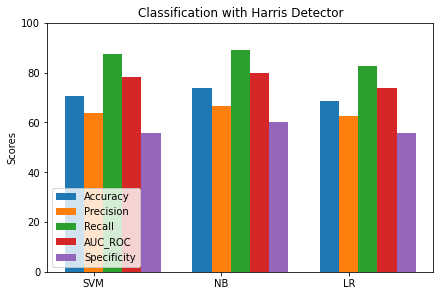

In [65]:
# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np

models = ("SVM", "NB", "LR")
model_scores = {
    'Accuracy': tuple(np.array(scores)[:, 0]),
    'Precision': tuple(np.array(scores)[:, 1]), 
    'Recall': tuple(np.array(scores)[:, 2]),
    'AUC_ROC': tuple(np.array(scores)[:, 3]),
    'Specificity': tuple(np.array(scores)[:, 4])
}

x = np.arange(len(species))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in model_scores.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    #ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Classification with Harris Detector')
ax.set_xticks(x + width, models)
ax.legend(loc='lower left')
ax.set_ylim(0, 100)

plt.show()